[*********************100%%**********************]  1 of 1 completed


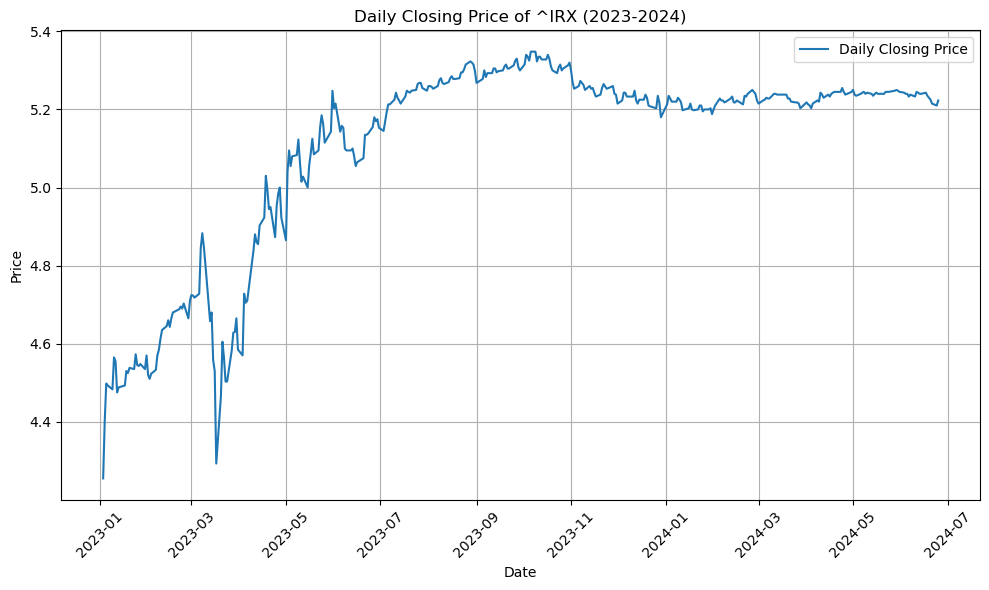

In [1]:
#import all library 
import yfinance as yf
import matplotlib.pyplot as plt
# Download daily closing price for a specific period from 1st jan 2023 to june 2024
# IRX is a 13 WEEK TREASURY BILL
data = yf.download("^IRX", start="2023-01-01", end="2024-06-26")["Close"]
# Plot the time series data
plt.figure(figsize=(10, 6)) 
plt.plot(data.index, data.values, label="Daily Closing Price")

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily Closing Price of ^IRX (2023-2024)")
plt.xticks(rotation=45)  
plt.grid(True)  
plt.legend() 

# Display the plot
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


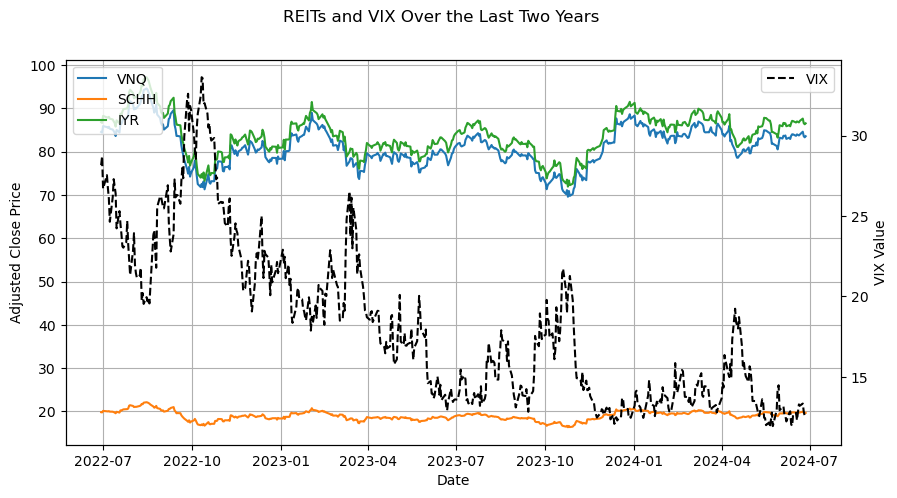

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# List of REITs ticker symbols
reits = ['VNQ', 'SCHH', 'IYR'] 

#The variable reits = ['VNQ', 'SCHH', 'IYR'] is a list of ticker symbols representing specific REIT ETFs (Exchange-Traded Funds). 
#These ticker symbols are used to identify and download the historical data for these ETFs. Here's a brief description of each:
#VNQ: Vanguard Real Estate ETF :The Vanguard Real Estate ETF tracks the performance of an index that measures the performance of publicly traded equity REITs. 
#SCHH: Schwab U.S. REIT ETF The Schwab U.S. REIT ETF aims to track the performance of the Dow Jones U.S. Select REIT Index, which includes publicly traded REITs. 
#IYR: iShares U.S. Real Estate ETF :The iShares U.S. Real Estate ETF seeks to track the investment results of an index composed of U.S. equities in the real estate sector.

# Ticker symbol for VIX
vix = '^VIX'

# Calculate the date two years ago from today
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Create an empty DataFrame to store the data
all_data = pd.DataFrame()

# Loop through each REIT and download the data
for reit in reits:
    data = yf.download(reit, start=start_date, end=end_date)
    data['Ticker'] = reit  # Add a column for the ticker symbol
    all_data = pd.concat([all_data, data])

# Download VIX data
vix_data = yf.download(vix, start=start_date, end=end_date)

# Reset the index for the final DataFrame
all_data.reset_index(inplace=True)
vix_data.reset_index(inplace=True)

# Save the data to a CSV file
all_data.to_csv('reits_data.csv', index=False)
vix_data.to_csv('vix_data.csv', index=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot each REIT's Adjusted Close price
for reit in reits:
    reit_data = all_data[all_data['Ticker'] == reit]
    ax1.plot(reit_data['Date'], reit_data['Adj Close'], label=reit)

ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close Price')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for the VIX data
ax2 = ax1.twinx()
ax2.plot(vix_data['Date'], vix_data['Adj Close'], label='VIX', color='black', linestyle='--')
ax2.set_ylabel('VIX Value')

fig.suptitle('REITs and VIX Over the Last Two Years')
ax2.legend(loc='upper right')

plt.show()




C:\Users\jay.maradiya\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


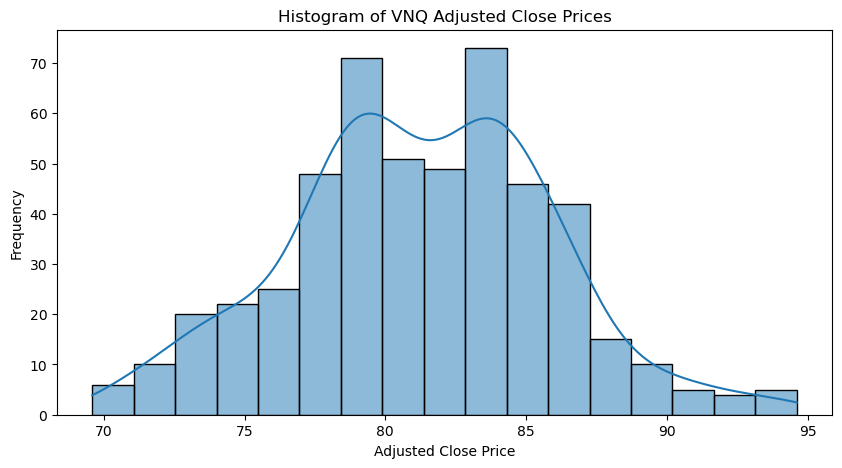

C:\Users\jay.maradiya\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


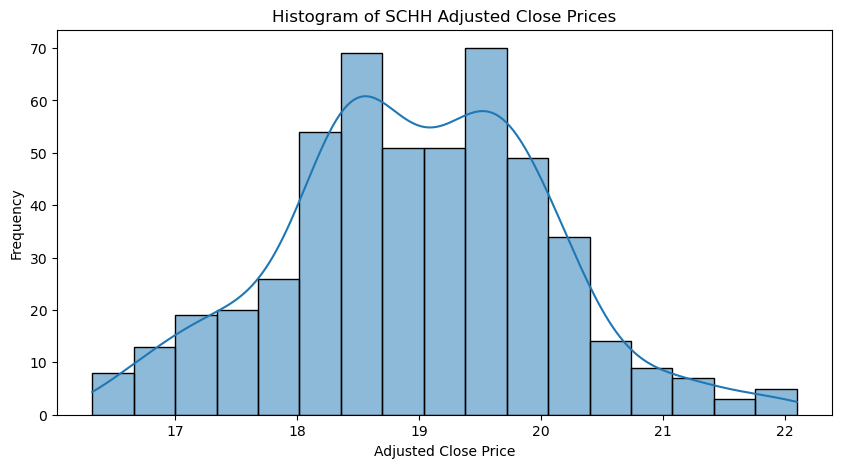

C:\Users\jay.maradiya\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


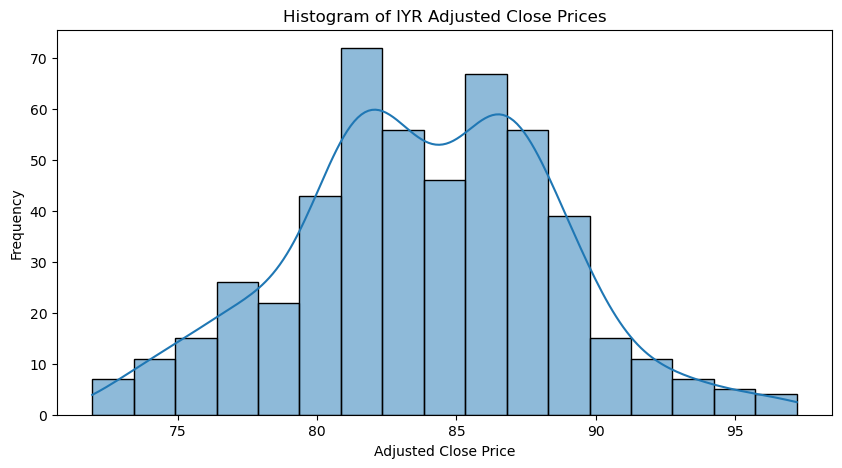

In [7]:
# Histograms, Q-Q plots, and box plots for each REIT
import seaborn as sns 
for reit in reits:
    reit_data = all_data[all_data['Ticker'] == reit]['Adj Close']

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(reit_data, kde=True)
    plt.title(f'Histogram of {reit} Adjusted Close Prices')
    plt.xlabel('Adjusted Close Price')
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1400x700 with 0 Axes>

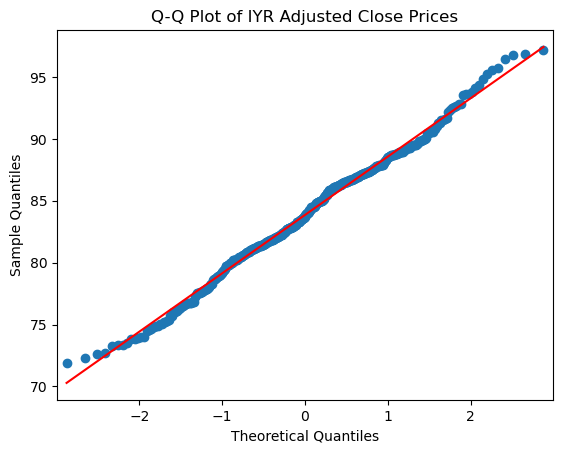

In [8]:
 # Insight: This histogram shows the distribution of adjusted close prices for {reit}. The presence of a single peak indicates that the prices are normally distributed.

    # Q-Q Plot
plt.figure(figsize=(14, 7))
sm.qqplot(reit_data, line='s')
plt.title(f'Q-Q Plot of {reit} Adjusted Close Prices')
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


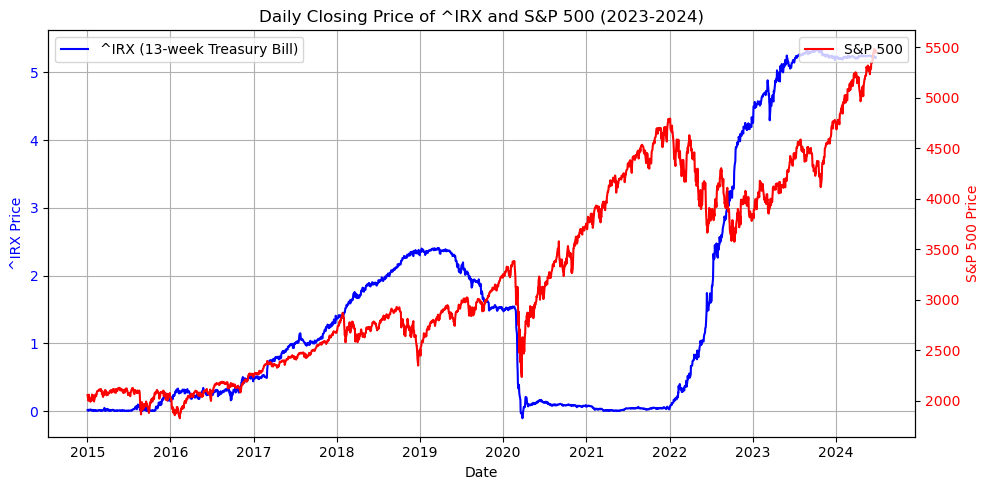

In [3]:
#import all library 
import yfinance as yf
import matplotlib.pyplot as plt

# Download daily closing price for IRX (13-week Treasury Bill) from 1st Jan 2023 to June 2024
irx_data = yf.download("^IRX", start="2015-01-01", end="2024-06-26")["Close"]

# Download daily closing price for S&P 500 for the same period
sp500_data = yf.download("^GSPC", start="2015-01-01", end="2024-06-26")["Close"]

# Plot the time series data with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot IRX data on the first y-axis
ax1.plot(irx_data.index, irx_data.values, label="^IRX (13-week Treasury Bill)", color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("^IRX Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for the S&P 500 data
ax2 = ax1.twinx()
ax2.plot(sp500_data.index, sp500_data.values, label="S&P 500", color='red')
ax2.set_ylabel("S&P 500 Price", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Customize the plot
plt.title("Daily Closing Price of ^IRX and S&P 500 (2023-2024)")
plt.xticks(rotation=45)
fig.tight_layout()

# Display the plot
plt.show()


In [2]:
# Save the plot with a custom filename
plt.savefig("treasury_and_sp500_2023_2024.png")

# Then display the plot
plt.show()

<Figure size 640x480 with 0 Axes>